<a href="https://colab.research.google.com/github/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis/blob/main/01-introduction-cook-books/01_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "scipy<2,>=0.18" "scikit-learn>=0.19" "mpl-axes-aligner<2,>=1.1"

In [ ]:
!git clone https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis
%cd Foundations-of-Cultural-and-Social-Data-Analysis/01-introduction-cook-books
!ls

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.feature_selection import chi2

In [2]:
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

# Easy

In [3]:
#Load the cookbook data set
df = pd.read_csv('data/feeding-america.csv', index_col='date')

In [4]:
df.head(10)

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...
1922,fofb.xml,mexican,breadsweets,ethnic,rice;sauce;water
1922,fofb.xml,mexican,fruitvegbeans,ethnic,pulp;water
1922,fofb.xml,mexican,meatfishgame,ethnic,cayenne;chili pepper;chili pulp;fat;flour;garl...
1922,fofb.xml,mexican,meatfishgame,ethnic,almond;baking powder;corned husk;cornstarch;ga...


In [5]:
#extract the "region" column
df[["region"]]

,region
date,
1922,ethnic
1922,ethnic
1922,ethnic
1922,ethnic
1922,ethnic
...,...
1904,general
1904,general
1904,general


In [6]:
#Print the number of unique regions in the data set.
df["region"].nunique()

6

In [7]:
#Using the same "region" column, produce a frequency distribution of the regions in the data.
df["region"].value_counts()

general      35508
ethnic        7040
midwest       2043
northeast     1320
south         1094
west          1027
Name: region, dtype: int64

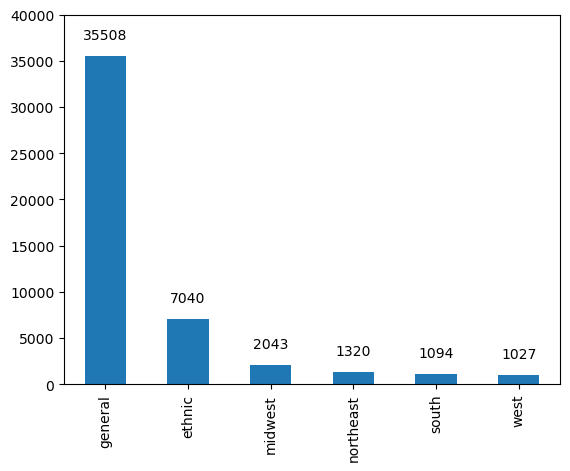

In [21]:
# Plotting the bar chart
ax = df["region"].value_counts().plot(kind='bar', color="C0", width=0.5)

# Adding annotations to each bar
# Loop through each bar in the chart.
for p in ax.patches:

    x = p.get_x() + p.get_width() / 2  # x position
    y = p.get_height()  # y position
    label = str(p.get_height())  # the text of the annotation will be the height of the bar
   
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')
    
    # updating the range of the y-axis
    plt.ylim(0, 40000)

plt.show()

# Moderate

In [22]:
# Use the function plot_trend() to create a time series plot for three or more ingredients of your own choice.
df[["ingredients"]]

,ingredients
date,
1922,chicken;green pepper;rice;salt;water
1922,chicken;rice
1922,allspice;milk
1922,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,butter;egg;green pepper;onion;parsley;pepper;s...
...,...
1904,egg white;egg yolk;gelatine;lemon;lemon juice;...
1904,cream;lemon juice;saccharine;salt;water
1904,lemon juice;orange juice;saccharine;water


In [23]:
grouped = df.groupby('date')  # group all rows from the same year
recipe_counts = grouped.size() # compute the size of each group
recipe_counts

date
1803     452
1807     929
1808     207
1815     276
1827      30
1830      94
1831     244
1832    2512
1838     446
1839     232
1840     718
1846       6
1847     364
1848     104
1850     573
1852    1384
1857     747
1864     660
1867      61
1868    1060
1869     545
1870    1126
1873    1538
1875     484
1876     695
1877    1089
1878    1563
1881     157
1882     786
1884     776
1885     715
1886    1254
1887    1510
1889     923
1890     198
1893    1656
1894    3690
1895     564
1896    1776
1897    1612
1901    1457
1902    1881
1904    1319
1905     964
1909    1307
1911     614
1912      39
1913     575
1914    1168
1915     559
1917     172
1918    1504
1919    2575
1920      34
1922     108
dtype: int64

In [24]:
# split ingredient strings into lists
ingredients = df['ingredients'].str.split(';')
ingredients

date
1922           [chicken, green pepper, rice, salt, water]
1922                                      [chicken, rice]
1922                                     [allspice, milk]
1922    [breadcrumb, cheese, green pepper, pepper, sal...
1922    [butter, egg, green pepper, onion, parsley, pe...
                              ...                        
1904    [egg white, egg yolk, gelatine, lemon, lemon j...
1904        [cream, lemon juice, saccharine, salt, water]
1904       [lemon juice, orange juice, saccharine, water]
1904    [grape fruit juice, grapefruit, juice, sacchar...
1904    [cream, egg, egg yolk, rum, saccharine, salt, ...
Name: ingredients, Length: 48032, dtype: object

In [25]:
# group all rows from the same year
groups = ingredients.groupby('date')

In [26]:
# merge the lists from the same year
ingredients = groups.sum()
ingredients

date
1803    [anchovy, bacon, beef, broth, claret, herb, on...
1807    [bone, cod, fish, head, jelly, meat, tongue, b...
1808    [bean, caper sauce, lettuce, onion, potato, wa...
1815    [flour, milk, potato, saleratus, salt, water, ...
1827    [egg yolk, anchovy sauce, cream, egg, fish, mi...
1830    [molass, water, beer, molass, sour beer, vineg...
1831    [ham, molass, salt, saltpetre, water, beef, mo...
1832    [butter, egg, jordan almond, lemon peel, mace,...
1838    [asparagus, bacon, butter, chicken, flour, mil...
1839    [flour, milk, molass, pearlash, salæratus, whe...
1840    [beef leg, cabbage, carrot, celery, garlic clo...
1846    [ash, corn, water, meal, water, potato, potato...
1847    [asparagus, bone, butter, calf foot, cayenne, ...
1848    [butter, egg, meal, milk, molass, salæratus, i...
1850    [fat, water, brine, pickle, pork, salt, ham, m...
1852    [bacon, beef, beef shin, broth, cow, fat, fowl...
1857    [breast, cayenne pepper, juice, lemon, salt, w...
1864    [

In [27]:
# compute counts per year
ingredients = ingredients.apply(pd.Series.value_counts)
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,258.0,197.0,185.0,159.0,123.0,121.0,93.0,93.0,85.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,332.0,325.0,367.0,204.0,123.0,181.0,255.0,97.0,125.0,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,110.0,77.0,81.0,73.0,54.0,31.0,82.0,24.0,29.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,110.0,87.0,89.0,119.0,42.0,23.0,107.0,5.0,10.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,2.0,18.0,NaN,1.0,1.0,12.0,6.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# normalise the counts
ingredients = ingredients.divide(recipe_counts, 0)
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.274489,0.104413,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.396135,0.115942,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.387681,0.018116,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.400000,0.200000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


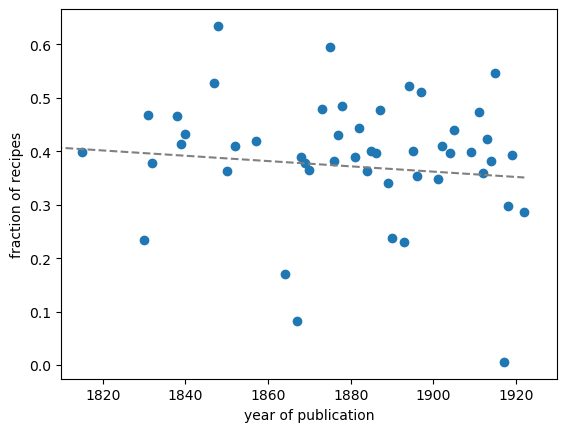

In [29]:
plot_trend('butter', ingredients)

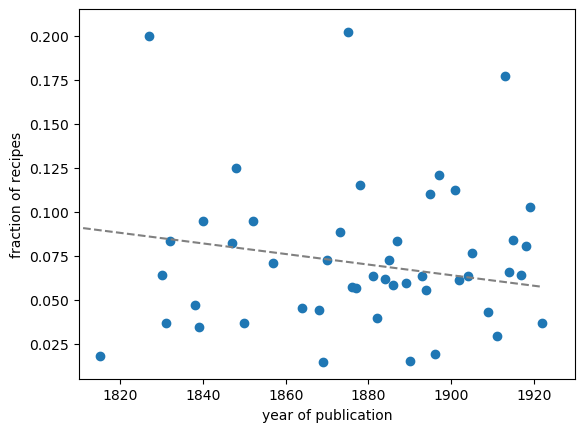

In [30]:
plot_trend('lemon', ingredients)

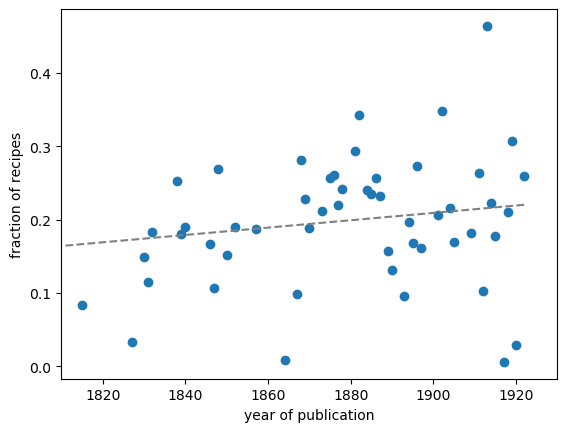

In [31]:
plot_trend('pepper', ingredients)

In [32]:
# Create a bar plot of the ten most distinctive ingredients for the pre- and postwar era using as keyness measure the Pearson's  𝜒2 test statistic.

from sklearn.feature_selection import chi2

# Transform the index into a list of labels, in which each label
# indicates whether a row stems from before or after the Civil War:
labels = ['Pre-Civil War' if year < 1864 else 'Post-Civil War' for year in ingredients.index]
# replace missing values with zero (.fillna(0)),
# and compute the chi2 statistic:
keyness, _ = chi2(ingredients.fillna(0), labels)
# Turn keyness values into a Series, and sort in descending order:
keyness = pd.Series(keyness, index=ingredients.columns).sort_values(ascending=False)

In [33]:
keyness.head(n=10)

nutmeg           1.072078
rice water       1.057412
loaf sugar       1.057213
mace             0.955977
pearlash         0.759318
lemon peel       0.694849
baking powder    0.608744
soda             0.589730
vanilla          0.533900
gravy            0.453685
dtype: float64

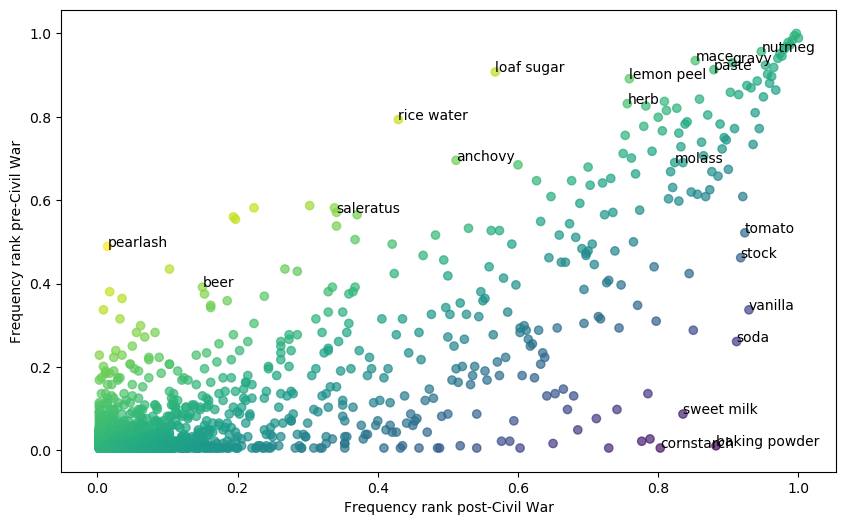

In [34]:
# step 1: compute summed ingredient counts per year
counts = df['ingredients'].str.split(';').groupby(
    'date').sum().apply(pd.Series.value_counts).fillna(0)

# step 2: construct frequency rankings for pre- and postwar years
pre_cw = counts[counts.index < 1864].sum().rank(method='dense', pct=True)
post_cw = counts[counts.index > 1864].sum().rank(method='dense', pct=True)

# step 3: merge the pre- and postwar data frames
rankings = pd.DataFrame({'Pre-Civil War': pre_cw, 'Post-Civil War': post_cw})

# step 4: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['Post-Civil War'], rankings['Pre-Civil War'],
            c=rankings['Pre-Civil War'] - rankings['Post-Civil War'],
            alpha=0.7)

# Add annotations of the 20 most distinctive ingredients
for i, row in rankings.loc[keyness.head(20).index].iterrows():
    plt.annotate(i, xy=(row['Post-Civil War'], row['Pre-Civil War']))

plt.xlabel("Frequency rank post-Civil War")
plt.ylabel("Frequency rank pre-Civil War");

In [35]:
# Produce two time series plots: one for the absolute number of recipes involving baking powder as ingredient

ingredients_absolute = df['ingredients'].str.split(';')
groups_ingredients = ingredients_absolute.groupby('date')
ingredients_absolute = groups_ingredients.sum()
ingredients_absolute = ingredients_absolute.apply(pd.Series.value_counts)
ingredients_absolute.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,258.0,197.0,185.0,159.0,123.0,121.0,93.0,93.0,85.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,332.0,325.0,367.0,204.0,123.0,181.0,255.0,97.0,125.0,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,110.0,77.0,81.0,73.0,54.0,31.0,82.0,24.0,29.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,110.0,87.0,89.0,119.0,42.0,23.0,107.0,5.0,10.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,2.0,18.0,NaN,1.0,1.0,12.0,6.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


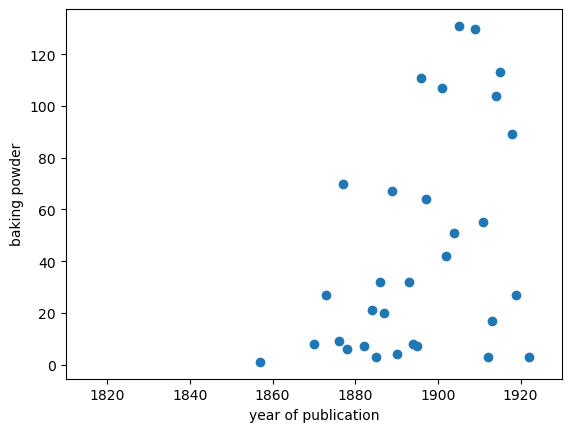

In [36]:
#plot_trend('baking powder', ingredients)
ax = ingredients_absolute['baking powder'].plot(style='o', xlim=(1810, 1930))
ax.set_ylabel("baking powder")
ax.set_xlabel("year of publication");

In [37]:
# a second plotting the absolute number "breadsweets" recipes over time.
df[['recipe_class']]

,recipe_class
date,
1922,soups
1922,meatfishgame
1922,soups
1922,fruitvegbeans
1922,eggscheesedairy
...,...
1904,eggscheesedairy
1904,breadsweets
1904,beverages


In [38]:
df['recipe_class'].value_counts()

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64

In [39]:
recipes = df['recipe_class']
recipes

date
1922              soups
1922       meatfishgame
1922              soups
1922      fruitvegbeans
1922    eggscheesedairy
             ...       
1904    eggscheesedairy
1904        breadsweets
1904          beverages
1904      fruitvegbeans
1904          beverages
Name: recipe_class, Length: 48032, dtype: object

In [40]:
# split ingredient strings into lists
recipes = df['recipe_class'].str.split()
# group all rows from the same year
groups_recipes = recipes.groupby('date')
# merge the lists from the same year
recipes = groups_recipes.sum()
# compute counts per year
recipes = recipes.apply(pd.Series.value_counts)
recipes.head()

,meatfishgame,breadsweets,fruitvegbeans,eggscheesedairy,accompaniments,beverages,soups,medhealth
date,,,,,,,,
1803,173.0,85.0,55.0,45.0,41.0,34.0,19.0,NaN
1807,335.0,219.0,97.0,64.0,88.0,60.0,38.0,28.0
1808,56.0,87.0,7.0,10.0,29.0,13.0,5.0,NaN
1815,42.0,132.0,28.0,44.0,20.0,5.0,4.0,1.0
1827,NaN,NaN,NaN,NaN,11.0,18.0,NaN,1.0


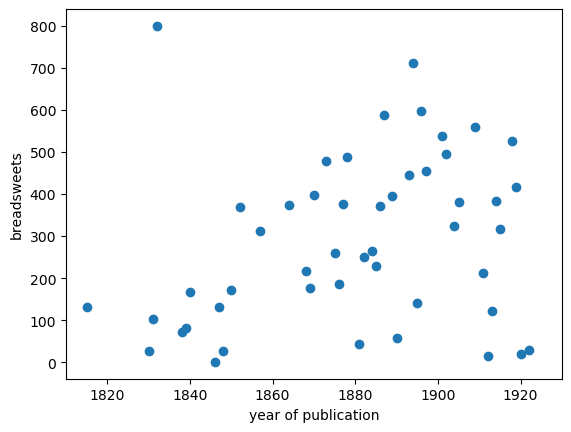

In [41]:
ax = recipes['breadsweets'].plot(style='o', xlim=(1810, 1930))
ax.set_ylabel("breadsweets")
ax.set_xlabel("year of publication");

# Challenging

In [48]:
df

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...
...,...,...,...,...,...
1904,fcsc.xml,NaN,eggscheesedairy,general,egg white;egg yolk;gelatine;lemon;lemon juice;...
1904,fcsc.xml,NaN,breadsweets,general,cream;lemon juice;saccharine;salt;water
1904,fcsc.xml,NaN,beverages,general,lemon juice;orange juice;saccharine;water


In [47]:
df["region"].unique()

array(['ethnic', 'general', 'northeast', 'midwest', 'west', 'south'],
      dtype=object)

In [53]:
northeast_data = df[df['region'] == 'northeast']['ingredients']
northeast_data

date
1867                           beefsteak
1867       butter;meat;pepper;salt;steak
1867                               sugar
1867                         spice;sugar
1867                              pickle
                      ...               
1884    fruit;granulated sugar;nut;water
1884                               water
1884           meat;rock salt;salt;water
1884                               sugar
1884              fruit juice;pulp;sugar
Name: ingredients, Length: 1320, dtype: object

In [57]:
ingredients_expanded = northeast_data.str.split(';', expand=True).stack().reset_index(level=1, drop=True).to_frame('ingredient')

# 步骤 2: 对展开后的原料数据进行分组统计
# 使用groupby进行分组，并计算每个组的大小（即每个原料的出现次数）
ingredient_counts = ingredients_expanded.groupby('ingredient').size()

# 对计数结果进行排序（可选）
ingredient_counts = ingredient_counts.sort_values(ascending=False)

# 显示结果
ingredient_counts

ingredient
salt                601
butter              507
water               451
sugar               435
flour               394
                   ... 
leaf                  1
lamb steak            1
knuckle               1
kidney suet           1
yellow-eyed bean      1
Length: 714, dtype: int64

In [58]:
midwest_data = df[df['region'] == 'midwest']['ingredients']
midwest_data

date
1901                 brown bread;fruit bread;raisin;water
1901                                    prune;syrup;water
1901                                           salt;water
1901                            date;oat;salt;water;wheat
1901                               salt;water;wheat cream
                              ...                        
1873    ham;meat;pulverized saltpetre;salt;saltpetre;s...
1873        brine;molass;pulverized saltpetre;salt;tongue
1873                           egg;lime;pickle;salt;water
1873                        beef suet;egg;lime;suet;water
1873                                lard;pepper;sage;salt
Name: ingredients, Length: 2043, dtype: object

In [59]:
ingredients_expanded_2 = midwest_data.str.split(';', expand=True).stack().reset_index(level=1, drop=True).to_frame('ingredient')

ingredient_counts_2 = ingredients_expanded_2.groupby('ingredient').size()

ingredient_counts_2 = ingredient_counts_2.sort_values(ascending=False)

print(ingredient_counts_2)

ingredient
sugar                 933
water                 905
salt                  883
butter                772
egg                   642
                     ... 
lentil                  1
lemonade                1
lemon whey              1
lemon syrup             1
yellow pear tomato      1
Length: 789, dtype: int64


ValueError: x and y must be the same size

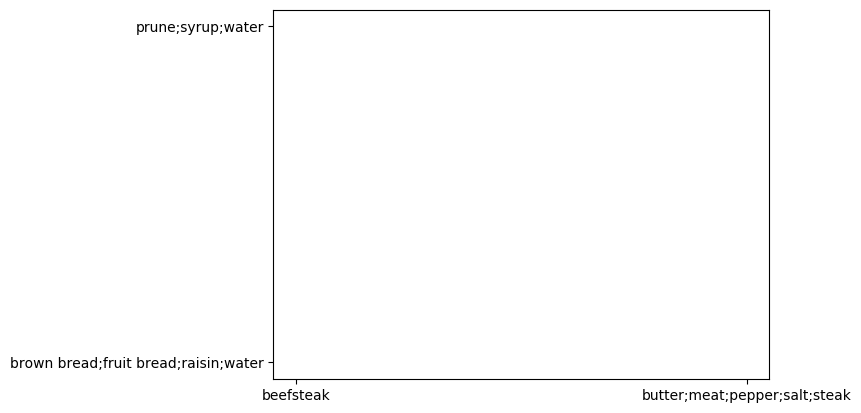

In [60]:
plt.scatter(northeast_data, midwest_data)
plt.xlabel('ingredient_counts')
plt.ylabel('ingredient_counts_2')
plt.title('Scatter Plot of Ingredient Usage: Northeast vs Midwest')
plt.show()

## Exercises

# Easy
1. Load the cookbook data set, and extract the "region" column. Print the number of unique regions in the data set.
2. Using the same "region" column, produce a frequency distribution of the regions in the data.
3. Create a bar plot of the different regions annotated in the dataset.

# Moderate
1. Use the function plot_trend() to create a time series plot for three or more ingredients of your own choice.
2. Go back to section Taste Trends in Culinary US History. Create a bar plot of the ten most distinctive ingredients for the pre- and postwar era using as keyness measure the Pearson's test statistic.
3. With the invention of baking powder, cooking efficiency went up. Could there be a relationship between the increased use of baking powder and the number of recipes describing cakes, sweets, and bread? (The latter recipes have the value "breadsweets" in the recipe_class column in the original data.) Produce two time series plots: one for the absolute number of recipes involving baking powder as ingredient, and a second plotting the absolute number "breadsweets" recipes over time.
# Challenging
1. Use the code to produce the scatter plot from section Taste Trends in Culinary US History, and experiment with different time frame settings to find distinctive words for other time periods. For example, can you compare twentieth-century recipes to nineteenth-century recipes?
2. Adapt the scatter plot code from section America's Culinary Melting Pot to find distinctive ingredients for two specific ethnic groups. (You could, for instance, contrast typical ingredients from the Jewish cuisine with those from the Creole culinary tradition.) How do these results differ from the ethnicity plot we created before? (Hint: For this exercise, you could simply adapt the very final code block of the chapter and use the somewhat simplified keyness measure proposed there.)
3. Use the "region" column to create a scatter plot of distinctive ingredients in the northeast of the United States versus the ingredients used in the midwest. To make things harder on yourself, you could use Pearson's test statistic as a keyness measure.
